In [5]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle('CarPricesData.pkl')
CarPricesDataNumeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#Correlation visual for feature selection

<AxesSubplot:>

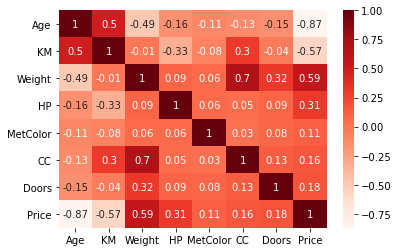

In [15]:
corr = CarPricesDataNumeric.corr().round(2)
sns.heatmap(data=corr,  annot=True, cmap="Reds",)

In [ ]:
#Multivariate EDA on independent and dependent variables 

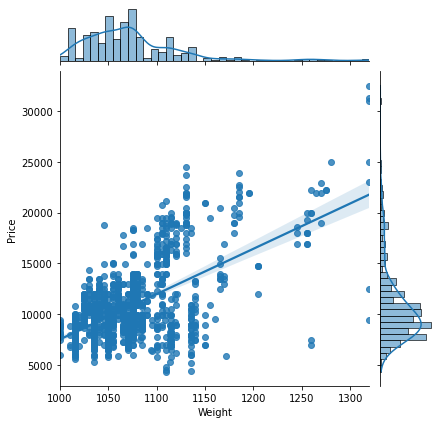

In [17]:
sns.jointplot(x="Weight", y="Price", kind="reg", data=CarPricesDataNumeric)

In [ ]:
#Correlation table

In [13]:
CarPricesDataNumeric.corr()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
Age,1.000000,0.502604,-0.488324,-0.156304,-0.105594,-0.130726,-0.146901,-0.874196
KM,0.502604,1.000000,-0.013607,-0.332904,-0.079864,0.304984,-0.035193,-0.569420
Weight,-0.488324,-0.013607,1.000000,0.088945,0.061842,0.698311,0.321082,0.589002
HP,-0.156304,-0.332904,0.088945,1.000000,0.058272,0.048307,0.091803,0.314134
MetColor,-0.105594,-0.079864,0.061842,0.058272,1.000000,0.034672,0.084796,0.107604
CC,-0.130726,0.304984,0.698311,0.048307,0.034672,1.000000,0.126635,0.159009
Doors,-0.146901,-0.035193,0.321082,0.091803,0.084796,0.126635,1.000000,0.183604
Price,-0.874196,-0.569420,0.589002,0.314134,0.107604,0.159009,0.183604,1.000000


In [6]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


In [7]:
# Installing required libraries
!pip install tensorflow
!pip install keras

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=04da7d3775e42a2768310bede4e8d4cf9b67efe1fcf2b2a250c5146c17db861f
  Stored in directory: c:\users\moorthy\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [8]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
51/51 [==============================] - 0s 1ms/step - loss: 0.9813
Epoch 2/50
51/51 [==============================] - 0s 1ms/step - loss: 0.9184
Epoch 3/50
51/51 [==============================] - 0s 1ms/step - loss: 0.6748
Epoch 4/50
51/51 [==============================] - 0s 1ms/step - loss: 0.3971
Epoch 5/50
51/51 [==============================] - 0s 1ms/step - loss: 0.2738
Epoch 6/50
51/51 [==============================] - 0s 920us/step - loss: 0.2301
Epoch 7/50
51/51 [==============================] - 0s 880us/step - loss: 0.2093
Epoch 8/50
51/51 [==============================] - 0s 942us/step - loss: 0.1950
Epoch 9/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1833
Epoch 10/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1749
Epoch 11/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1683
Epoch 12/50
51/51 [==============================] - 0s 1ms/step - loss: 0.1630
Epoch 13/50
51/51 [========================

In [9]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 36.07419522473558
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 43.20598345314357
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 62.44744487093873
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 56.68417235546822
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 33.36526456517764
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 38.27641197922124
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 58.045192029514055
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 64.46487338950084
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 36.26335874596422
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 35.80309390887969
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 59.17958464902139
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 53.17720316641028
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 57.57688937860362
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 29.92283635568134
15 Parameters: batc

In [ ]:
#Visualizing the best parameters for ANN model

<AxesSubplot:xlabel='Parameters'>

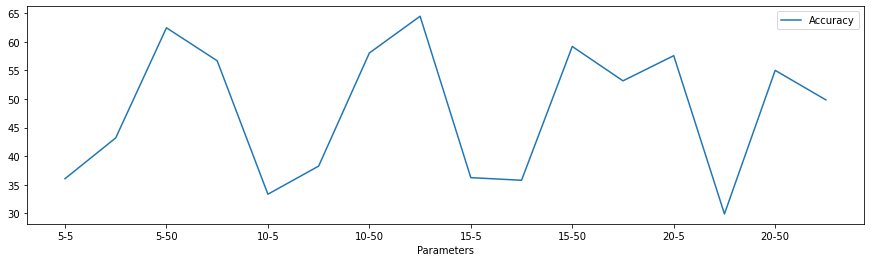

In [10]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [54]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 12, epochs = 65, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9823.893555
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9802.315430
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8190.121582
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9186.109375
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,9010.718750


In [55]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 91.21152134667363


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9823.893555,1.267401
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9802.315430,22.605571
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8190.121582,9.201621
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9186.109375,7.677293
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,9010.718750,0.678422


In [ ]:
#Dumping the output file as pickle and converting the data to CSV

In [2]:
import pickle as pkl
import pandas as pd
with open("CarPricesData.pkl", "rb") as f:
    object = pkl.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'file.csv')